# Preamble

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# NB: Necessary Imports

In [2]:
# Import different modules for using with the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cee_em
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image

from sklearn.linear_model import LogisticRegression as logis
from sklearn.metrics import confusion_matrix

# -------------------------------
#    Manual Prep
# -------------------------------

from sklearn import linear_model, datasets
import itertools
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Function Definitions

**Confusion Matrix Plotter**

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Generate training data

In [4]:
# Training data - three randomly-generated Gaussian-distributed 
# clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2+1, size = N)
# Mean of each cluster
means = np.array([[-1, 1, -1], [-1, 1, 1],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 3)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])
X = X.T

print(y.shape)
print(X.shape)

(1000,)
(1000, 2)


#### Display the data that you generated to find something like the following:

In [5]:
#display(Image(filename='./images/wm_dat1.png'))

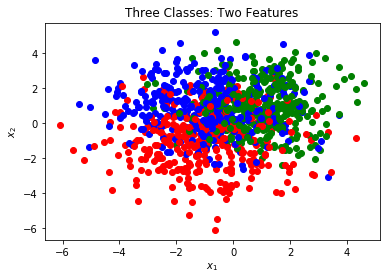

(1000, 2)
(1000,)


In [6]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------
c = np.array(["r","g","b"])

for k in range(X.T.shape[1]):
    plt.plot(X.T[0,k],X.T[1,k],c[y[k]]+"o")
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Three Classes: Two Features")
plt.show()

print(X.shape)
print(y.shape)

# Fit the training data to the scikit-learn softmax classifier

In [7]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

clf = logis(C=1e5)
clf.fit(X, y)

print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


The image above shows that there is considerable overlap between the classes. 

**Use your trained classifier to assign all the training data to different classes.**

In [8]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

y_predict = clf.predict(X)

print(y_predict.shape)

(1000,)


**Print the confusion matrix and also plot it, to get something like the image below:**

In [9]:
#display(Image(filename='./images/wm_confusion.png'))

Normalized confusion matrix
[[0.74777448 0.10385757 0.14836795]
 [0.10746269 0.74328358 0.14925373]
 [0.22256098 0.22560976 0.55182927]]


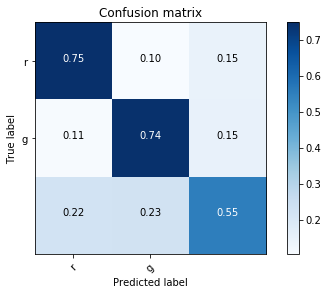

In [10]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------


c = np.array(["r","g"]) # use ["r", "g", "b"] for 3 classes
cm = confusion_matrix(y,y_predict)
plot_confusion_matrix(cm,c)

**Plot the different classes as predicted by your system. You should get something like:** 

In [11]:
#display(Image(filename='./images/wm_dat2.png'))

(1000, 2)
(1000,)
(666, 635)
(666, 635)


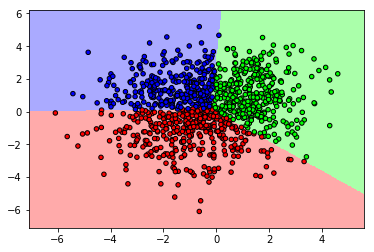

In [12]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

# SETUP
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# COLORMESH PLOT
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# SCATTER PLOT
plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap=cmap_bold,
          edgecolor='k', s=20)
plt.axis('tight')

# SHAPE TEST -- FOR DEBUGGING PURPOSES ONLY
print(X.shape)
print(y_predict.shape)
print(xx.shape)
print(yy.shape)


**Can you tell from the graph that this is a *linear* classifier?**

In [13]:
# ANSWER: YES. Especially from the colormesh

# Implement a Naive Bayes Classifier

**Implement your own Naive Bayes Classifier** (from first principles). Train it using the exact same data you used for the previous question (write it in a seperate python file which you can import into the notebook). Implement it in a generic way, i.e. it should be able to work on $d$ dimensional data and it should not be limited to a certain amount of classes.

In [14]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

from gstuff import NaiveClassifier as naive

clf = naive.NaiveClassifier()
clf.fit(X,y)

**Use your trained classifier to assign all the training data to different classes.**

In [ ]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

y_predict = clf.predict(X)

print("variances:")
print(clf.get_variances())

**Print the confusion matrix and also plot it, to get something like the image below:**

In [16]:
#display(Image(filename='./images/conf_mat_bayes.jpg'))

Normalized confusion matrix
[[0.71513353 0.115727   0.16913947]
 [0.09552239 0.7641791  0.14029851]
 [0.18902439 0.25304878 0.55792683]]


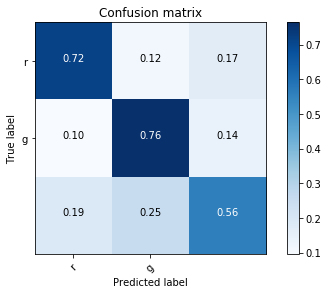

In [17]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

c = np.array(["r","g"]) # use ["r", "g", "b"] for 3 classes
cm = confusion_matrix(y,y_predict)
plot_confusion_matrix(cm,c)

**Plot the different classes as predicted by your system. You should get something like:**

In [18]:
#display(Image(filename='./images/predict_bayes.jpg'))

(1000, 2)
(1000,)
(666, 635)
(666, 635)


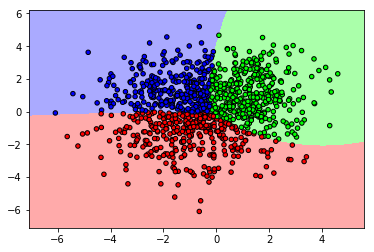

In [19]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

# SETUP
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# COLORMESH PLOT --- TAKES SUPER LONG WITH MY CODE
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# SCATTER PLOT
plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap=cmap_bold,
          edgecolor='k', s=20)
plt.axis('tight')

# SHAPE TEST -- FOR DEBUGGING PURPOSES ONLY
print(X.shape)
print(y_predict.shape)
print(xx.shape)
print(yy.shape)

# Implement a Logistic Regression Classifier

**Use the following data:**

In [20]:
# Training data - two randomly-generated Gaussian-distributed clouds of points in 2d space
np.random.seed(0)
# Number of points
N = 1000
# Labels for each cluster
y = np.random.randint(low=0, high=2, size = N)
# Mean of each cluster
means = np.array([[-1, 1], [-1, 1],])
# Covariance (in X and Y direction) of each cluster
covariances = np.random.random_sample((2, 2)) + 1
# Dimensions of each point
X = np.vstack([np.random.randn(N)*covariances[0, y] + means[0, y],
               np.random.randn(N)*covariances[1, y] + means[1, y]])

X = X.T # converts the data to row data, like all the other data

print(y.shape)
print(X.shape)

(1000,)
(1000, 2)


**Implement your own Logistic Regression classifier for two classes only** (from first principles). It should be generic and be able to work on $d$ dimensional data (and two classes). Please make your implementation as modular as possible, having a seperate function for the Hessian and the gradient vector (write it in a seperate python file which you can import into the notebook). A regularization term based on a Gaussian prior (with zero mean and covariance matrix $\lambda\mathbf{I}$) must be included.  Optionally, a bias term also needs to be incorporated into your classifier - this can be implemented by augmenting the training dataset with an additional all-one feature.

In [21]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

from gstuff import LogisticRegression as logreg

hyper = 2
tolerance = 1e-5
clf = logreg.LogisticRegression(hyper, tolerance)

**Use your classifier to fit the data.**

In [22]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

clf.fit(X, y)

**Use your trained classifier to assign all the training data to different classes.**

In [23]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

y_predict = clf.predict(X)

**Print the confusion matrix and also plot it, to get something like the image below:** 

In [ ]:
#display(Image(filename='./images/conf_mat_logreg.jpg'))

Normalized confusion matrix
[[0.84677419 0.15322581]
 [0.18253968 0.81746032]]


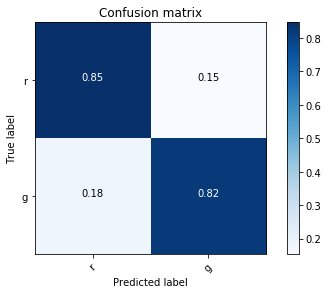

In [25]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

c = np.array(["r","g"]) # use ["r", "g", "b"] for 3 classes
cm = confusion_matrix(y,y_predict)
plot_confusion_matrix(cm,c)

**Plot the different classes as predicted by your system. Add your decision boundary to the same plot. You should get something like:**

In [26]:
#display(Image(filename='./images/predict_logreg.jpg'))

(1000, 2)
(1000,)
(673, 582)
(673, 582)


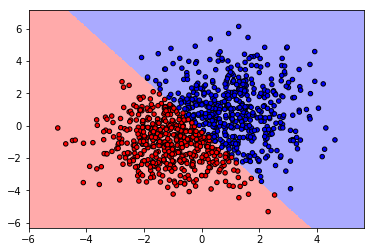

In [27]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

# SETUP
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# COLORMESH PLOT
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# SCATTER PLOT
plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap=cmap_bold,
          edgecolor='k', s=20)
plt.axis('tight')

# SHAPE TEST -- FOR DEBUGGING PURPOSES ONLY
print(X.shape)
print(y_predict.shape)
print(xx.shape)
print(yy.shape)

** Before continuing in the notebook, you will need to install the `lasagne` Python module with "pip3 install --user lasagne" **

# Classify the MNIST digits 

First load the dataset - for more information about the dataset, see http://yann.lecun.com/exdb/mnist/.

In [28]:
from mnist import load_dataset
X_train, y_train, X_valid, y_valid, X_test, y_test = load_dataset()

The MNIST database provided in the assignment resources consists of low-resolution (28x28) grayscale images of handwritten digits ($0,1,2,3,4,5,6,7,8,9$). First, you read in a set of training digits and display them interactively to get an idea what they look like. Afterwards, you build and train a softmax classifier using scitkit-image and scikit-learn. You will then classify the digits in the test set and display the results. Finally, you will display the weights as images.

## Display the test digits interactively.

In [ ]:
from ipywidgets import interact
def show_digits(n=0):
    """
    Show the first 1000 digits in the training set
    """
    
    plt.imshow(X_train[n][0], cmap=cee_em.binary)   
    
    plt.show()
    
#w = interact(show_digits, n =(0, 1000)) # JUPYTER HAS TRUST ISSUES WITH INTERACT


## Train the softmax classifier

**Use the training set to build a softmax classifier. Use this classifier to classify the digits in the training set and the test set separately. Print the confusion matrix and also display it as an image for each case to get something like:**

In [30]:
#display(Image(filename='./images/wm_confusion2.png'))

(10000, 1, 28, 28)
Normalized confusion matrix
[[9.72448980e-01 0.00000000e+00 3.06122449e-03 2.04081633e-03
  2.04081633e-03 7.14285714e-03 9.18367347e-03 2.04081633e-03
  2.04081633e-03 0.00000000e+00]
 [0.00000000e+00 9.77973568e-01 3.52422907e-03 2.64317181e-03
  0.00000000e+00 8.81057269e-04 3.52422907e-03 8.81057269e-04
  1.05726872e-02 0.00000000e+00]
 [8.72093023e-03 9.68992248e-03 8.84689922e-01 1.93798450e-02
  8.72093023e-03 5.81395349e-03 1.25968992e-02 1.16279070e-02
  3.68217054e-02 1.93798450e-03]
 [3.96039604e-03 1.98019802e-03 2.07920792e-02 9.05940594e-01
  1.98019802e-03 2.07920792e-02 4.95049505e-03 1.28712871e-02
  1.98019802e-02 6.93069307e-03]
 [1.01832994e-03 3.05498982e-03 4.07331976e-03 4.07331976e-03
  9.33808554e-01 0.00000000e+00 8.14663951e-03 3.05498982e-03
  7.12830957e-03 3.56415479e-02]
 [1.00896861e-02 3.36322870e-03 2.24215247e-03 3.81165919e-02
  1.00896861e-02 8.63228700e-01 2.13004484e-02 8.96860987e-03
  3.47533632e-02 7.84753363e-03]
 [9.3945720

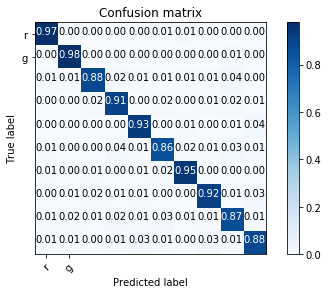

In [31]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------
X = X_train[:,0].reshape(50000, -1)
y = y_train

clf = logis(C=1e5)
clf.fit(X, y)

# TRAIN DATA PREDICTIONS
#y_predict = clf.predict(X)

#c = np.array(["r","g"]) # use ["r", "g", "b"] for 3 classes
#cm = confusion_matrix(y,y_predict)
#plot_confusion_matrix(cm,c)

print(X_test.shape)

X = X_test[:,0].reshape(10000, -1)
y = y_test

# TEST DATA PREDICTIONS
y_predict = clf.predict(X)

c = np.array(["r","g"]) # use ["r", "g", "b"] for 3 classes
cm = confusion_matrix(y,y_predict)
plot_confusion_matrix(cm,c)

### Accuracy

**Calculate the accuracy of your system as a fraction of the correctly classified digits. You should get something like 0.9254. use - `logis(C=1e5, solver='lbfgs', multi_class='multinomial')`**

Normalized confusion matrix
[[9.97959184e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.02040816e-03 0.00000000e+00
  1.02040816e-03 0.00000000e+00]
 [0.00000000e+00 9.99118943e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.81057269e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.68992248e-04 0.00000000e+00 9.81589147e-01 3.87596899e-03
  3.87596899e-03 9.68992248e-04 9.68992248e-04 1.93798450e-03
  1.93798450e-03 3.87596899e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.77227723e-01
  0.00000000e+00 1.38613861e-02 0.00000000e+00 0.00000000e+00
  3.96039604e-03 4.95049505e-03]
 [0.00000000e+00 0.00000000e+00 2.03665988e-03 1.01832994e-03
  9.83706721e-01 0.00000000e+00 0.00000000e+00 1.01832994e-03
  2.03665988e-03 1.01832994e-02]
 [0.00000000e+00 1.12107623e-03 0.00000000e+00 1.00896861e-02
  0.00000000e+00 9.74215247e-01 2.24215247e-03 0.00000000e+00
  8.96860987e-03 3.36322870e-03]
 [0.00000000e+00 0.00000000e+0

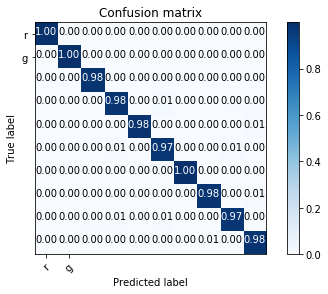

In [32]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

clf = logis(C=1e5, solver='lbfgs', multi_class='multinomial')

clf.fit(X, y)
y_predict = clf.predict(X)

c = np.array(["r","g"]) # use ["r", "g", "b"] for 3 classes
cm = confusion_matrix(y,y_predict)
plot_confusion_matrix(cm,c)

correct = 0

for n in range(0, 10000):
    if y[n] == y_predict[n]:
        correct += 1
    
print("Accuracy:")
accuracy = correct/10000
print(accuracy)

accuracy = clf.score(X, y, sample_weight=None)
print(accuracy)

## Extracting the weights and display as images.

**Extract the weights of the softmax classifier and display them as images. Each set of weights should correspond to a specific digit**. 

**As an example the weight image associated with the 0 digit should look similar to this:**

In [33]:
#display(Image(filename='./wm_softmax_mnist_weights/wm_0.png'))

In [34]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------

# plot weights vs the pixel position
coef = clf.coef_.copy()

def show_weights(n=0):
    plt.figure(figsize=(10, 5))
    scale = np.abs(coef).max()

    #l2_plot = plt.subplot(2, 5, n + 1)

    
    plt.imshow(coef[n].reshape(28, 28), interpolation='nearest',
                   cmap='viridis', vmin=-scale, vmax=scale)   
    
#w = interact(show_weights, n = (0, 9))

## Further investigation

Fit the softmax classifier for different values of the regularization parameter - we recommend values evenly spaced on the log scale - and show the corresponding weight images for some digit as the parameter changes.  Explain the changes in the weight images observed. Moreover, plot the accuracy of your classifier as a function of the regularization parameter. Use this plot to expand on your answer.

In [ ]:
#--------------------------------------------------------
#                Your Work Here
#--------------------------------------------------------
accuracy = [0. for p in range(0, 10)]
lambdaa = [0. for p in range(0, 10)]

for p in range(0, 10):
    X = X_train[:,0].reshape(50000, -1)
    y = y_train
    
    lambdaa[p] = 1 * 10 ** p
    clf = logis(C=lambdaa[p])
    clf.fit(X, y)

    X = X_train[:,0].reshape(X_train.shape[0], -1)
    y = y_train

    y_predict = clf.predict(X)
    
    accuracy[p] = clf.score(X, y, sample_weight=None)

for p in range(0, 10):
    print("Accuracy for lamda {} is: {}".format(lambdaa[p], accuracy[p]))


In [ ]:
# It can be seen that Choosing C = 1 works much better than C = 1e5 ... 